<img src="../.images/logosnb.png" alt="Banner" style="width: 800px;"/>

<div style='color: #690027;' markdown="1">
    <h1>IRIS DATASET</h1> 
</div>

<div class="alert alert-box alert-success">
In deze notebook zie je hoe een <em>machinaal leren</em>-systeem erin slaagt twee klassen van punten <b>lineair van elkaar te scheiden</b>. Het algoritme vertrekt daarbij van een willekeurig gekozen rechte. Het algortime past de coëfficiënten in de vergelijking van deze rechte zo aan, gebaseerd op de gegeven data. Uiteindelijk wordt een rechte bekomen die de twee klassen van elkaar scheidt.
</div>

De Iris dataset werd in 1936 door de Brit Ronald Fischer gepubliceerd in 'The use of multiple measurements in taxonomic problems' [1][2].<br> 
De dataset beteft drie soorten irissen (*Iris setosa*, *Iris virginica* en *Iris versicolor*).
Fischer kon de soorten van elkaar onderscheiden afgaande op vier kenmerken: de lengte en de breedte van de kelkbladen en de bloembladen.

<table><tr>
<td><img src="../.images/IntroductieMachineLearning/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Drawing" style="width: 200px;"/></td>
<td><img src="../.images/IntroductieMachineLearning/Iris_versicolor_3.jpg" alt="Drawing" style="width: 220px;"/></td>
<td><img src="../.images/IntroductieMachineLearning/Iris_virginica.jpg" alt="Drawing" style="width: 203px;"/></td>
</tr></table>

<table><tr>
    <td><em>Iris setosa</em> [3]</td>
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td><em>Iris versicolor</em> [4]</td>
<td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td><em>Iris virginica</em> [5]</td>
</tr></table>
<br>
<center>Figuur 1: <em>Iris setosa</em> door Kosaciec Szczecinkowaty [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons;<br> <em>Iris versicolor</em> door Frank Mayfield [CC BY-SA 2.0 (https://creativecommons.org/licenses/by-sa/2.0)], via Wikimedia Commons;<br> <em>Iris virginica</em>. No machine-readable author provided. Dlanglois assumed (based on copyright claims). CC BY-SA 3.0, via Wikimedia Commons. </center>

De Iris dataset is een *multivariate dataset*, d.w.z. een dataset met meerdere variabelen, die van elke soort 50 monsters bevat. Van elk monster werden de lengte en de breedte van een bloemblad en een kelkblad opgemeten in centimeter. 

<img src="../.images/IntroductieMachineLearning/bloemblad-kelkblad.jpg" alt="Drawing" style="width: 200px;"/> 

### De nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div style='color: #690027;' markdown="1">
    <h2>1. Inlezen van de data</h2> 
</div>

Lees met de module `pandas` de Iris dataset in.

In [2]:
# dataset inlezen
iris = pd.read_csv("../.data/IntroductieMachineLearning/irisHoofding.dat", header="infer")  # in te lezen tabel heeft een hoofding

<div style='color: #690027;' markdown="1">
    <h2>2. Tonen van de ingelezen data</h2> 
</div>

Kijk de gegevens is. Zowel de vier kenmerken, als de naam van de soort worden weergegeven. Het aantal monsters is gemakkelijk af te lezen.

Hoeveel **variabelen** heeft deze *multivariate dataset*?

Antwoord: de dataset heeft ... variabelen.

In [3]:
# dataset weergeven in tabel
iris

,lengte kelkblad,breedte kelkblad,lengte bloemblad,breedte bloemblad,soort Iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Deze tabel komt overeen met een matrix met 150 rijen en 5 kolommen: <br>
150 monsters, 4 kenmerken (x1, x2, x3, x4) en 1 label (y) <br><br>
De kenmerken:<br>
- eerste kolom: lengte kelkblad 
- tweede kolom: breedte kelkblad
- derde kolom: lengte bloemblad 
- vierde kolom: breedte bloemblad<br><br>

Het label:<br>
- laatste kolom: de naam van de soort 

<div class="alert alert-box alert-info">
Voor het machinaal leren-systeem zullen de <em>kenmerken</em> als <b>input</b> dienen en de labels als <b>output</b>.
</div>

Het is mogelijk enkel het begin of enkel het laatste deel van de tabel te tonen.

In [4]:
# eerste deel van de tabel
iris.head()

,lengte kelkblad,breedte kelkblad,lengte bloemblad,breedte bloemblad,soort Iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# laatste deel van de tabel
iris.tail()

,lengte kelkblad,breedte kelkblad,lengte bloemblad,breedte bloemblad,soort Iris
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Het is ook mogelijk om een bepaald deel van de tabel te tonen.

In [6]:
# tabel tonen van rij 46 t.e.m. rij 53
iris[46:54]

,lengte kelkblad,breedte kelkblad,lengte bloemblad,breedte bloemblad,soort Iris
46,5.1,3.8,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor


Merk op dat <span style="background-color:whitesmoke; font-family:consolas; font-size:1em;">[46:54]</span> staat voor het *halfopen interval* [46:54[.

Met deze laatste deeltabel ga je aan de slag.

<div style='color: #690027;' markdown="1">
    <h2>3. Onderzoek: kunnen beide soorten irissen onderscheiden worden gebaseerd op twee kenmerken?</h2> 
</div>

<div style='color: #690027;' markdown="1">
    <h3>3.1 Beschouw van elk van twee soorten irissen, *Iris setosa*  en *Iris versicolor*, vier monsters</h3> 
</div>

<table><tr>
<td><img src="../.images/IntroductieMachineLearning/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Drawing" style="width: 200px;"/></td>
<td><img src="../.images/IntroductieMachineLearning/Iris_versicolor_3.jpg" alt="Drawing" style="width: 300px;"/></td>
</tr></table>

<table><tr>
<td> *Iris setosa*</td>
<td> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td> *Iris versicolor* </td>
</tr></table>

In [17]:
# vier monsters van setosa en vier monsters van versicolor selecteren
# lengte kelkblad en lengte bloemblad selecteren, deze staan in eerste en derde kolom
K = iris.iloc[46:54, [0, 2]].values            # K wordt opgebouwd met eerste kolom (index 0) en derde kolom (index 2)
# dimensie van matrix K opvragen (K is een matrix met 8 rijen en 2 kolommen)
K.shape        

(8, 2)

In [9]:
print(K)

[[5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]]


In [18]:
print(K[:, 0])    # eerste kolom van X: lengte kelkblad (: staat voor alle rijen, 0 staat voor kolom met index 0)
print(K[:, 1])    # tweede kolom van X: lengte bloemblad

[5.1 4.6 5.3 5.  7.  6.4 6.9 5.5]
[1.6 1.4 1.5 1.4 4.7 4.5 4.9 4. ]


<div style='color: #690027;' markdown="1">
    <h3>3.2 De data standaardiseren</h3> 
</div>

Om te standaardiseren wordt er overgegaan op de Z-scores van de kenmerken.<br>
Voor meer uitleg over het belang van standaardiseren verwijzen we naar de notebook 'Standaardiseren'.

In [19]:
x1 = K[:, 0]  # eerste kenmerk: lengte kelkblad
x2 = K[:, 1]  # tweede kenmerk: lengte bloemblad
x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)

In [16]:
print(x1)
print(x2)

[-0.72932496 -1.31278492 -0.49594097 -0.84601695  1.48782291  0.78767095
  1.37113092 -0.26255698]
[-0.90653347 -1.03603825 -0.97128586 -1.03603825  1.10079064  0.97128586
  1.23029543  0.64752391]


In [38]:
# gestandaardiseerde kenmerken opnieuw in matrix steken
X = np.stack((x1, x2), axis = 1) # axis 1 betekent dat x1 en x2 worden beschouwd als kolommen (bij axis 0 rijen)
print(X)
print(X.shape)
print(X.shape[1])

[[-0.72932496 -0.90653347]
 [-1.31278492 -1.03603825]
 [-0.49594097 -0.97128586]
 [-0.84601695 -1.03603825]
 [ 1.48782291  1.10079064]
 [ 0.78767095  0.97128586]
 [ 1.37113092  1.23029543]
 [-0.26255698  0.64752391]]
(8, 2)
2


<div style='color: #690027;' markdown="1">
    <h3>3.3 De data weergeven in puntenwolk</h3> 
</div>

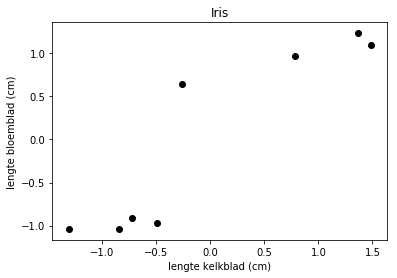

In [34]:
# lengte bloemblad t.o.v. lengte kelkblad
# lengte kelkblad komt op x-as, lengte bloemblad komt op y-as
plt.scatter(x1, x2, color="black", marker="o")

plt.title("Iris")
plt.xlabel("lengte kelkblad (cm)")          # xlabel geeft een omschrijving op de x1-as
plt.ylabel("lengte bloemblad (cm)")         # ylabel geeft een omschrijving op de x2-as
plt.show()

Er zijn twee groepen te onderscheiden. Op de grafiek is niet duidelijk welk datapunt bij welke soort iris hoort, aangezien alle punten op dezelfde manier worden voorgesteld. 

<div style='color: #690027;' markdown="1">
    <h3>3.4 Data weergeven als twee klassen</h3> 
</div>

De voorstelling van de puntenwolk wordt aangepast zodat de twee irissoorten elk door een ander symbool worden weergegeven. 

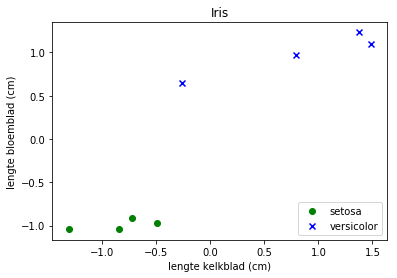

In [31]:
# lengte bloemblad t.o.v. lengte kelkblad
plt.scatter(x1[:4], x2[:4], color="green", marker="o", label="setosa")      # setosa zijn eerste 4
plt.scatter(x1[4:], x2[4:], color="blue", marker="x", label="versicolor")   # versicolor zijn volgende 4
           
plt.title("Iris")
plt.xlabel("lengte kelkblad (cm)")
plt.ylabel("lengte bloemblad (cm)")
plt.legend(loc="lower right")
plt.show()

<div style='color: #690027;' markdown="1">
    <h2>4. Classificatie</h2> 
</div>

<div style='color: #690027;' markdown="1">
    <h3>4.1 Geannoteerde data</h3> 
</div>

Het AI-systeem zal leren uit de 8 gelabelde voorbeelden.<br> 
Lees de labels in.

In [50]:
y = iris.iloc[46:54, 4].values             # labels: laatste kolom van de oorspronkelijke tabel
y = np.where(y == "Iris-setosa", 0, 1)     # labels numeriek maken, setosa:0, versicolor:1

In [51]:
print(y)

[0 0 0 0 1 1 1 1]


De kenmerken zitten in een matrix X en de labels in een vector y. De i-de rij van X komt overeen met twee kenmerken van een bepaald monster en het label van de monster zit in de i-de plaats in y.

<div style='color: #690027;' markdown="1">
    <h3>4.2 Zonder verborgen laag (perceptron)</h3> 
</div>

Om een rechte te vinden die de twee soorten irissen van elkaar scheidt, wordt er vertrokken van een willekeurig gekozen rechte. Dit gebeurt door de coëfficiënten in de vergelijking van deze rechte willekeurig te kiezen.<br> Beide kanten van deze *scheidingslijn* bepalen een andere *klasse*.<br> Het systeem wordt *getraind* met de trainingset inclusief de corresponderende labels: Voor elk punt van de trainingset wordt nagegaan of het punt aan de juiste kant van de scheidingslijn ligt. Bij een punt dat niet aan de juiste kant van de scheidingslijn ligt, worden de coëfficiënten in de vergelijking van de rechte aangepast. <br>
De volledige trainingset wordt een aantal keer doorlopen. Zo'n keer noemt men een *epoch*. Het systeem *leert* gedurende deze *pogingen ('epochs')*.

Als twee klassen lineair scheidbaar zijn, kan men een rechte vinden die beide klassen scheidt. Men kan de vergelijking van de scheidingslijn zodanig opschrijven (in de vorm ax+by+c=0) dat voor elk punt (x1, y1) in de ene klasse ax1+by1+c >= 0 en voor elk punt (x1, y1) in de andere klasse ax1 +by1+c < 0. <br> 
Zolang dit niet voldaan is, moeten de coëfficiënten worden aangepast.<br>
De trainingset met bijhorende labels wordt enkele keren doorlopen. Voor elk punt worden de coëfficiënten aangepast indien nodig.

In [61]:
def grafiek(coeff_x1, coeff_x2, cte):
        """Plot scheidingsrechte ('decision boundary') en geeft vergelijking ervan."""
        # lengte bloemblad t.o.v. lengte kelkblad
        plt.scatter(x1[:4], x2[:4], color="green", marker="o", label="setosa")      # setosa zijn eerste 4 (label 0)
        plt.scatter(x1[4:], x2[4:], color="blue", marker="x", label="versicolor")   # versicolor zijn de volgende 4 (label 1)
        x = np.linspace(-1.5, 1.5, 10)
        y_r = -coeff_x1/coeff_x2 * x - cte/coeff_x2
        print("De grens is een rechte met vgl.", coeff_x1, "* x1 +", coeff_x2, "* x2 +", cte, "= 0")
        plt.plot(x, y_r, color="black")
        
        plt.title("Classificatie iris")
        plt.xlabel("lengte kelkblad (cm)")
        plt.ylabel("lengte bloemblad (cm)")
        plt.legend(loc="lower right")
        plt.show()


class Perceptron(object):
    """Perceptron classifier.""" 
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """self heeft drie parameters: leersnelheid, aantal pogingen, willekeurigheid."""
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        # kolommatrix van de gewichten ('weights')
        # willekeurig gegenereerd uit normale verdeling met gemiddelde 0 en standaardafwijking 0.01
        # aantal gewichten is aantal kenmerken in X plus 1 (+1 voor de bias)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)     # gewichtenmatrix die 3 gewichten bevat 
        print("Initiële willekeurige gewichten:", self.w_)
        self.errors_ = []    # foutenlijst
       
        # plot grafiek met scheidingsrechte
        grafiek(self.w_[0], self.w_[1], self.w_[2])
        
        # gewichten punt per punt aanpassen, gebaseerd op feedback van de verschillende pogingen        
        for _ in range(self.n_iter):
            print("epoch =", _)
            errors = 0
            teller = 0
            for x, label in zip(X, y):            # x is datapunt, y overeenkomstig label
                print("teller =", teller)         # tel punten, het zijn er acht
                print("punt:", x, "\tlabel:", label)
                gegiste_klasse = self.predict(x)
                print("gegiste klasse =", gegiste_klasse)
                # aanpassing nagaan voor dit punt
                update = self.eta * (gegiste_klasse - label)     # als update = 0, juiste klasse, geen aanpassing nodig
                print("update=", update)
                # grafiek en gewichten eventueel aanpassen na dit punt
                if update !=0:
                    self.w_[0:2] -= update *x
                    self.w_[2] -= update
                    errors += update
                    print("gewichten =", self.w_)
                    grafiek(self.w_[0], self.w_[1], self.w_[2])     # voorlopige 'decision boundary'
                teller += 1
            self.errors_.append(errors)           # na alle punten, totale fout toevoegen aan foutenlijst
            print("foutenlijst =", self.errors_)          
        return self        # geeft gewichtenmatrix en errorlijst terug
    
    def net_input(self, x):      # punt invullen in de voorlopige scheidingsrechte
        """Berekenen van z = lineaire combinatie van de  inputs inclusief bias en de weights voor elke gegeven punt."""
        return np.dot(x, self.w_[0:2]) + self.w_[2]
    
    def predict(self, x):
        """Gist klasse."""
        print("punt ingevuld in vergelijking rechte:", self.net_input(x))
        klasse = np.where(self.net_input(x) >=0, 1, 0)
        return klasse
    

Initiële willekeurige gewichten: [ 0.01624345 -0.00611756 -0.00528172]
De grens is een rechte met vgl. 0.01624345363663242 * x1 + -0.006117564136500754 * x2 + -0.005281717522634557 = 0


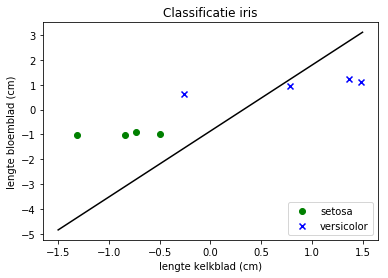

epoch = 0
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011582697001663174
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.020267848100365565
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007395608135240574
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012685924175233298
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012151507623164587
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.00157087554317914
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.009463772834168592
gegiste klasse = 1
upda

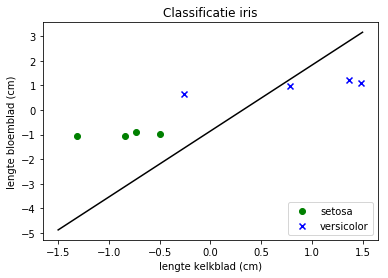

foutenlijst = [-0.0001]
epoch = 1
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011522248275136567
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.020200465969137587
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007345479940405834
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012630797363154256
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01228372261937316
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0017130877738763149
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.00960743740439919

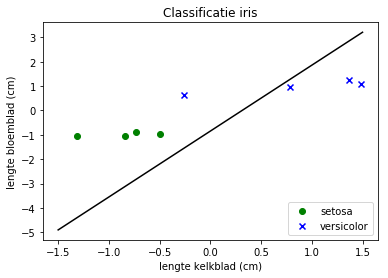

foutenlijst = [-0.0001, -0.0001]
epoch = 2
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01146179954860996
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.020133083837909606
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007295351745571096
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012575670551075216
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01241593761558173
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0018553000045734907
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.009751101

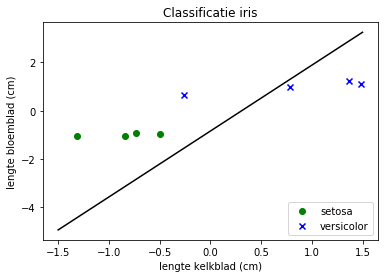

foutenlijst = [-0.0001, -0.0001, -0.0001]
epoch = 3
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01140135082208335
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.02006570170668163
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007245223550736356
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012520543738996175
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012548152611790302
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0019975122352706657
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.

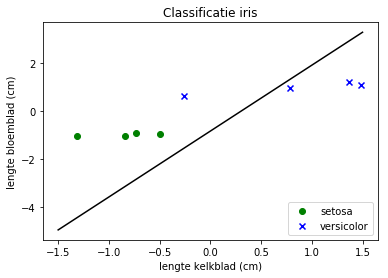

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001]
epoch = 4
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011340902095556743
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01999831957545365
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0071950953559016175
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012465416926917133
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012680367607998873
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0021397244659678433
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking

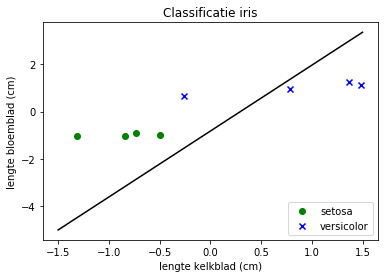

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 5
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011280453369030134
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019930937444225673
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007144967161066876
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012410290114838091
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012812582604207447
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0022819366966650182
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in ver

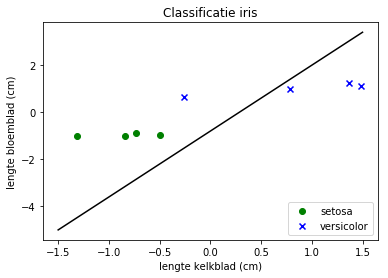

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 6
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011220004642503528
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019863555312997695
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007094838966232137
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01235516330275905
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01294479760041602
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.002424148927362193
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld 

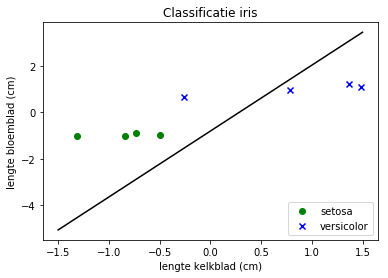

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 7
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011159555915976921
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01979617318176972
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007044710771397398
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012300036490680009
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.013077012596624592
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.002566361158059371
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt

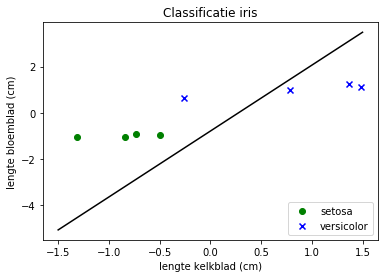

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 8
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01109910718945031
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01972879105054174
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006994582576562659
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012244909678600969
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01320922759283316
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0027085733887565458
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label

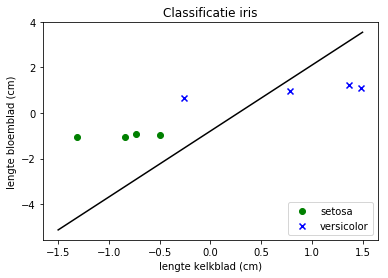

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 9
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011038658462923703
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019661408919313762
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.00694445438172792
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012189782866521927
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.013341442589041734
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0028507856194537216
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029

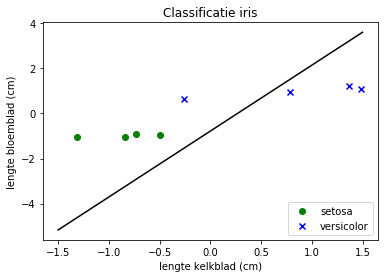

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]


In [66]:
# perceptron, leersnelheid 0.0001 en 10 pogingen
ppn = Perceptron(eta=0.0001, n_iter=10)
ppn.fit(X,y)

Niet gelukt! De leersnelheid of het aantal pogingen kunnen worden aangepast.<br>
Bij een toenemend aantal epochs, blijft de fout constant, wat kan wijzen op een te kleine of te grote leersnelheid. 
We proberen meer epochs, als dat niet helpt nemen we een grotere leersnelheid.

Initiële willekeurige gewichten: [ 0.01624345 -0.00611756 -0.00528172]
De grens is een rechte met vgl. 0.01624345363663242 * x1 + -0.006117564136500754 * x2 + -0.005281717522634557 = 0


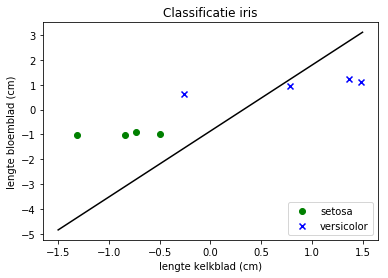

epoch = 0
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011582697001663174
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.020267848100365565
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007395608135240574
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012685924175233298
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012151507623164587
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.00157087554317914
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.009463772834168592
gegiste klasse = 1
upda

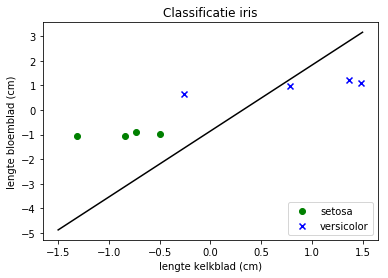

foutenlijst = [-0.0001]
epoch = 1
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011522248275136567
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.020200465969137587
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007345479940405834
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012630797363154256
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01228372261937316
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0017130877738763149
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.00960743740439919

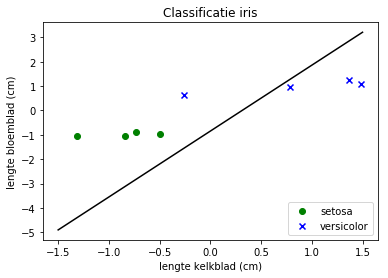

foutenlijst = [-0.0001, -0.0001]
epoch = 2
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01146179954860996
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.020133083837909606
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007295351745571096
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012575670551075216
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01241593761558173
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0018553000045734907
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.009751101

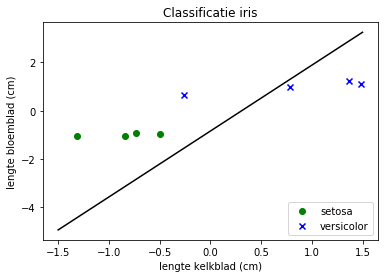

foutenlijst = [-0.0001, -0.0001, -0.0001]
epoch = 3
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01140135082208335
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.02006570170668163
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007245223550736356
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012520543738996175
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012548152611790302
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0019975122352706657
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.

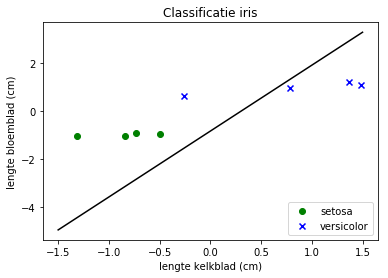

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001]
epoch = 4
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011340902095556743
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01999831957545365
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0071950953559016175
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012465416926917133
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012680367607998873
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0021397244659678433
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking

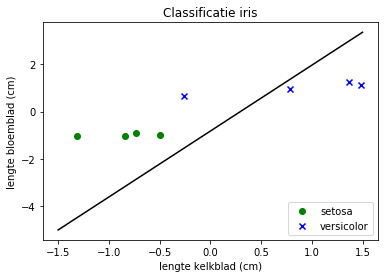

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 5
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011280453369030134
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019930937444225673
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007144967161066876
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012410290114838091
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012812582604207447
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0022819366966650182
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in ver

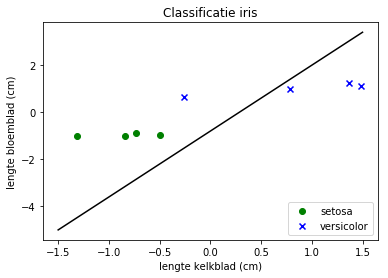

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 6
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011220004642503528
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019863555312997695
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007094838966232137
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01235516330275905
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01294479760041602
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.002424148927362193
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld 

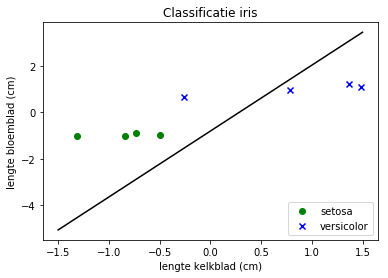

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 7
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011159555915976921
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01979617318176972
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007044710771397398
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012300036490680009
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.013077012596624592
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.002566361158059371
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt

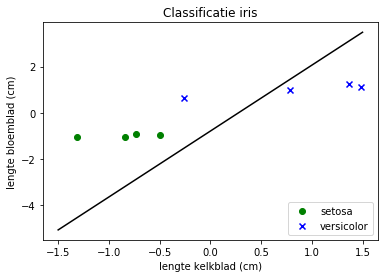

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 8
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01109910718945031
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01972879105054174
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006994582576562659
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012244909678600969
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01320922759283316
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0027085733887565458
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label

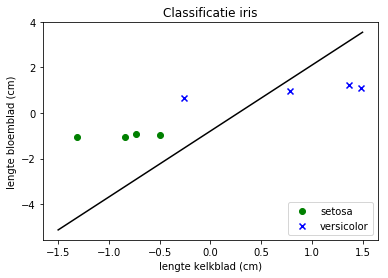

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 9
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011038658462923703
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019661408919313762
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.00694445438172792
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012189782866521927
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.013341442589041734
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0028507856194537216
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029

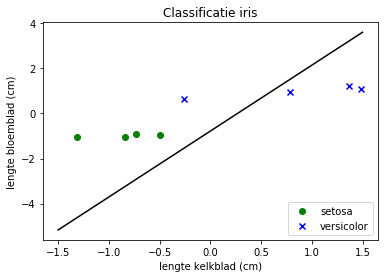

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 10
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010978209736397095
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019594026788085785
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006894326186893181
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012134656054442885
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.013473657585250307
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0029929978501508966
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113

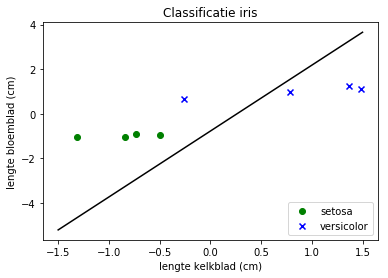

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 11
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010917761009870488
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019526644656857807
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006844197992058442
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012079529242363843
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.013605872581458879
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.003135210080848074
gegiste klasse = 1
update= 0.0
teller = 6
punt: 

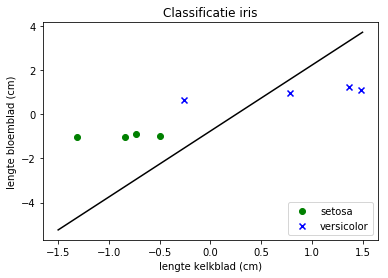

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 12
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01085731228334388
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01945926252562983
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006794069797223701
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012024402430284803
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01373808757766745
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.003277422311545249
gegiste klasse = 1
update= 0.0
teller = 6


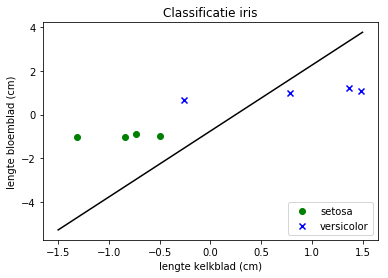

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 13
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01079686355681727
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01939188039440185
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0067439416023889615
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011969275618205762
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01387030257387602
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.003419634542242424
gegiste klasse = 1
update= 0.0
t

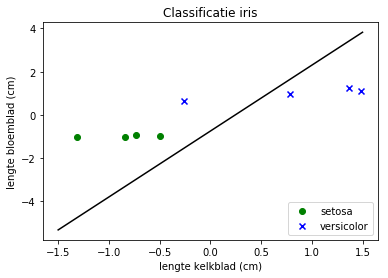

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 14
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010736414830290664
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019324498263173874
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006693813407554223
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01191414880612672
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.014002517570084593
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0035618467729396012
gegiste klasse = 1
up

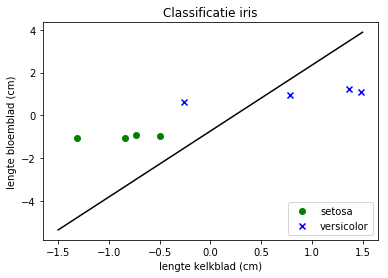

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 15
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010675966103764057
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019257116131945896
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006643685212719484
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011859021994047678
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.014134732566293166
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0037040590036367758
gegiste kla

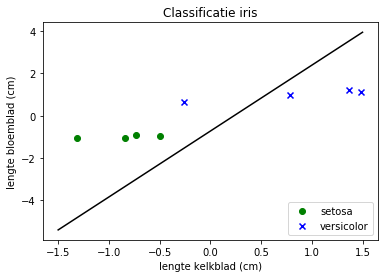

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 16
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010615517377237448
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019189734000717922
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006593557017884746
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01180389518196864
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.014266947562501735
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.003846271234333951
gegi

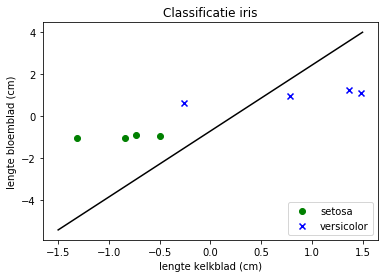

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 17
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01055506865071084
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01912235186948994
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006543428823050007
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011748768369889598
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.014399162558710304
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.003988483465031

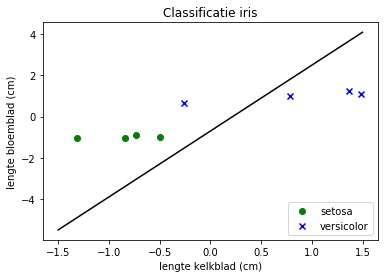

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 18
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010494619924184233
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019054969738261963
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0064933006282152685
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011693641557810556
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.014531377554918878
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.004

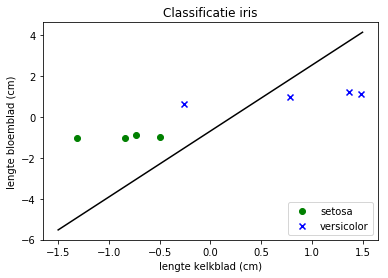

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 19
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010434171197657625
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018987587607033986
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006443172433380529
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011638514745731516
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01466359255112745
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte

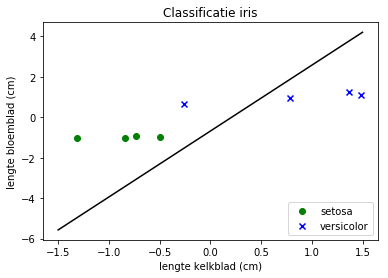

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 20
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010373722471131018
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01892020547580601
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0063930442385457895
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011583387933652475
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.014795807547336023
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijk

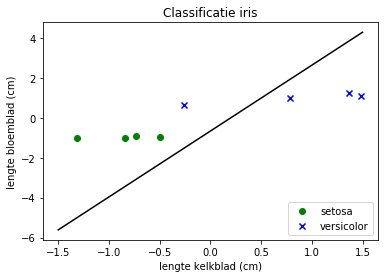

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 21
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.01031327374460441
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01885282334457803
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006342916043711051
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011528261121573433
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.014928022543544597
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in ve

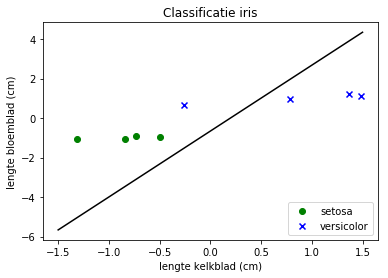

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 22
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010252825018077803
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018785441213350056
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006292787848876312
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011473134309494393
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.015060237539753163
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ing

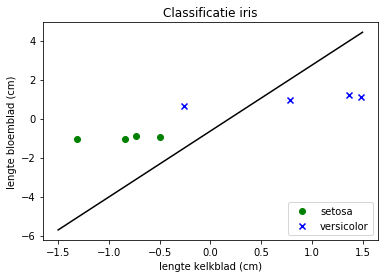

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 23
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010192376291551196
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01871805908212208
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006242659654041574
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011418007497415353
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.015192452535961735
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1


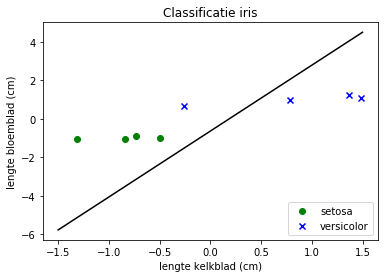

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 24
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010131927565024589
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.0186506769508941
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006192531459206833
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01136288068533631
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.015324667532170308
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	la

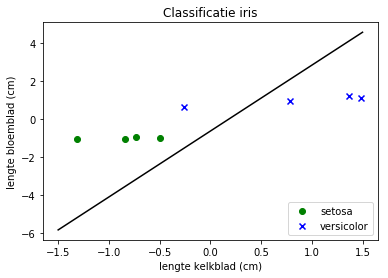

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 25
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010071478838497981
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018583294819666123
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006142403264372096
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011307753873257272
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01545688252837888
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97

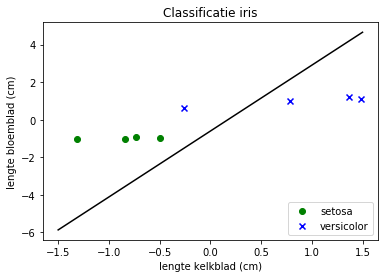

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 26
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010011030111971372
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018515912688438146
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006092275069537356
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011252627061178229
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.015589097524587451
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.787

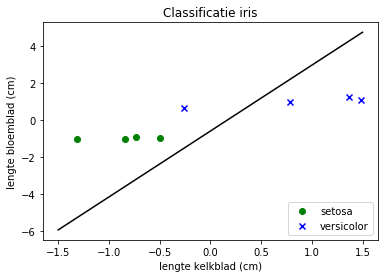

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 27
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009950581385444766
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01844853055721017
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006042146874702618
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01119750024909919
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01572131252079602
gegiste klasse = 1
update= 0.0
teller = 5
punt: 

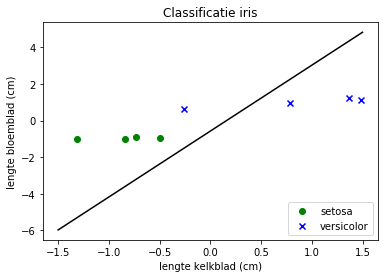

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 28
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009890132658918157
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01838114842598219
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005992018679867879
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011142373437020148
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.015853527517004595
gegiste klasse = 1
update= 0.0
teller

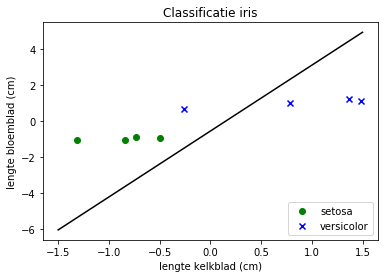

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 29
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.00982968393239155
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018313766294754213
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0059418904850331395
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011087246624941108
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.015985742513213167
gegiste klasse = 1
update= 

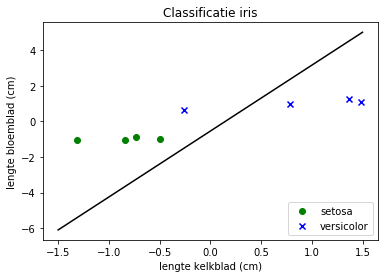

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 30
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009769235205864943
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018246384163526235
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005891762290198402
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011032119812862066
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01611795750942174
gegiste klasse = 1


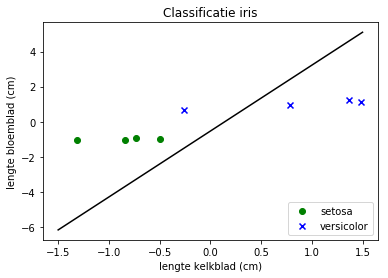

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 31
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009708786479338333
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018179002032298257
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0058416340953636615
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010976993000783026
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.016250172505630305
gegiste 

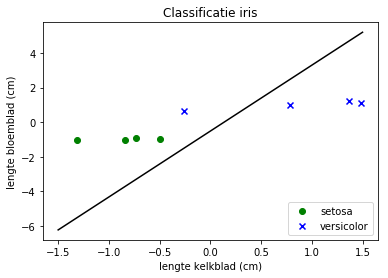

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 32
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009648337752811728
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018111619901070283
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005791505900528923
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010921866188703985
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.016382387501838878


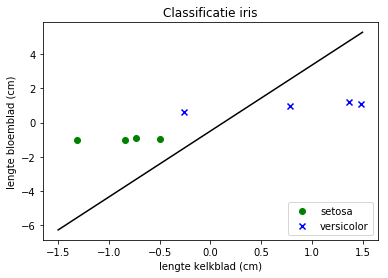

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 33
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009587889026285119
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018044237769842302
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005741377705694184
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010866739376624943
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.0165146024

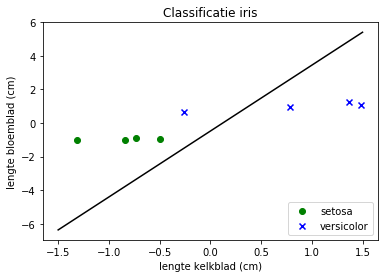

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 34
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009527440299758511
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017976855638614328
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005691249510859446
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010811612564545903
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.0

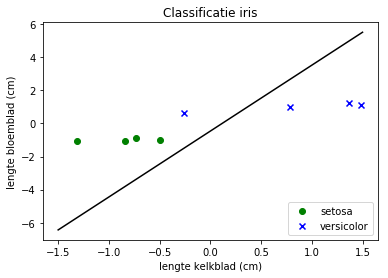

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 35
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009466991573231906
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017909473507386347
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005641121316024706
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010756485752466861
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking re

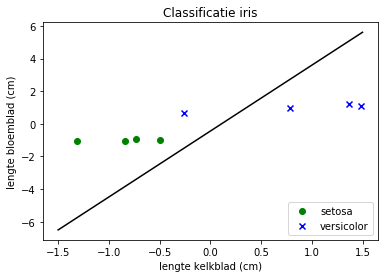

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 36
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009406542846705297
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017842091376158373
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005590993121189968
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01070135894038782
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergeli

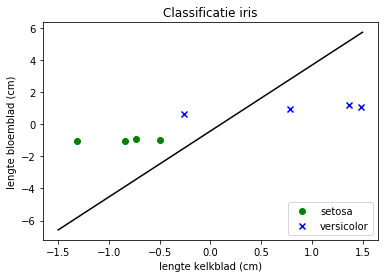

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 37
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.00934609412017869
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017774709244930395
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005540864926355229
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01064623212830878
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in

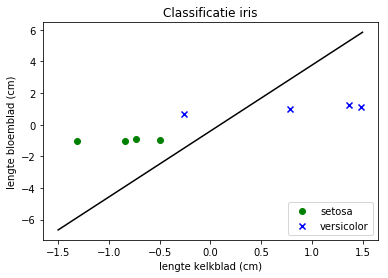

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 38
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009285645393652084
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017707327113702417
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0054907367315204895
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01059110531622974
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt 

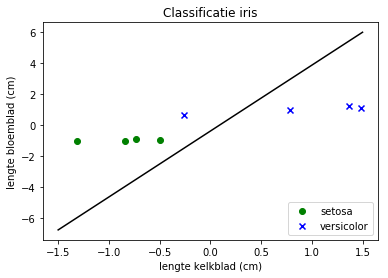

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 39
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009225196667125474
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017639944982474443
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005440608536685751
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010535978504150698
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label

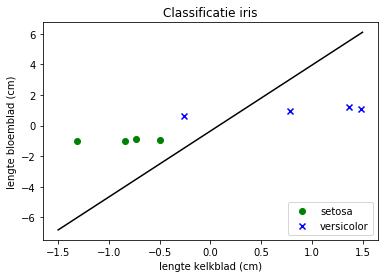

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 40
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009164747940598869
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017572562851246462
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005390480341851013
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010480851692071658
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.1007906

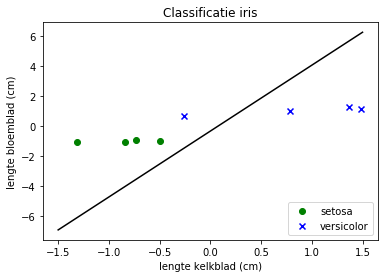

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 41
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.00910429921407226
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017505180720018484
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005340352147016275
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010425724879992618
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1

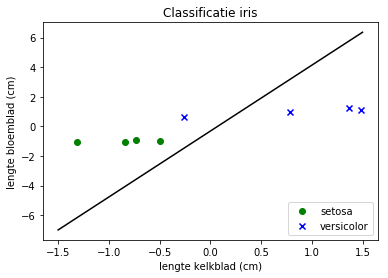

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 42
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009043850487545652
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017437798588790507
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005290223952181535
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010370598067913578
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.

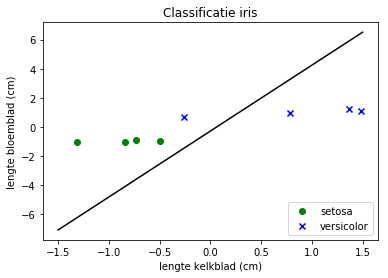

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 43
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.008983401761019047
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017370416457562533
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0052400957573467966
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010315471255834537
gegiste klasse = 0
update= 0.0
teller = 4

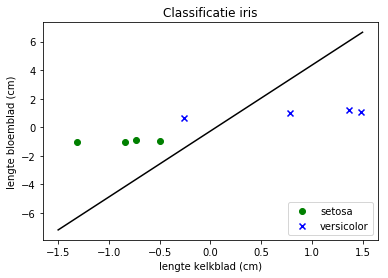

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 44
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.008922953034492438
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01730303432633456
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005189967562512059
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010260344443755495
gegiste klasse = 0
update= 0.0
tel

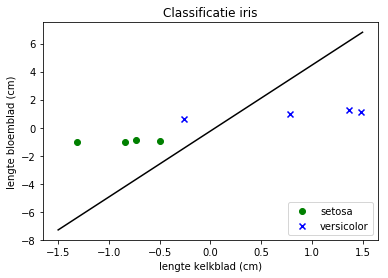

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 45
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.008862504307965832
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017235652195106574
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005139839367677319
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010205217631676455
gegiste klasse = 0
updat

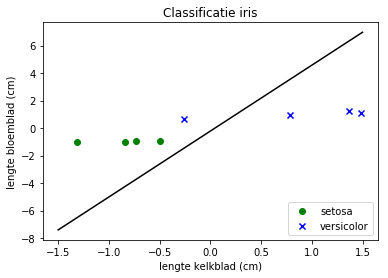

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 46
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.008802055581439223
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.0171682700638786
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.00508971117284258
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010150090819597415
gegiste klasse = 0

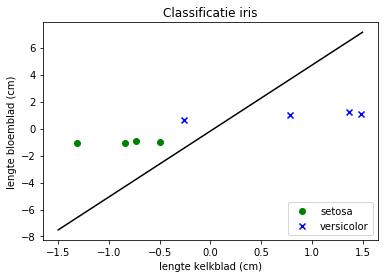

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 47
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.008741606854912615
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017100887932650622
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005039582978007842
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010094964007518373
gegist

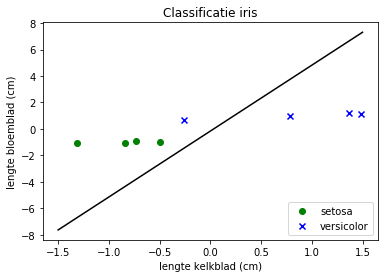

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 48
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.00868115812838601
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.017033505801422648
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0049894547831731036
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.0100398371954393

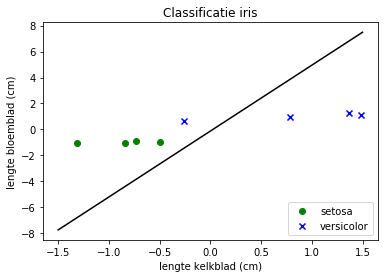

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
epoch = 49
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.0086207094018594
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.016966123670194667
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.004939326588338364
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.009984710

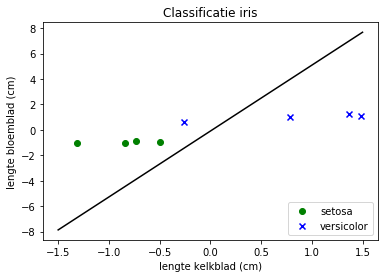

foutenlijst = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]


In [67]:
# perceptron, leersnelheid 0.0001 en 50 pogingen
ppn = Perceptron(eta=0.0001, n_iter=50)
ppn.fit(X,y)

Niet gelukt! We gaan over naar een grotere leersnelheid.

Initiële willekeurige gewichten: [ 0.01624345 -0.00611756 -0.00528172]
De grens is een rechte met vgl. 0.01624345363663242 * x1 + -0.006117564136500754 * x2 + -0.005281717522634557 = 0


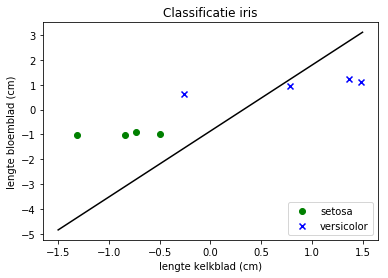

epoch = 0
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011582697001663174
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.020267848100365565
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007395608135240574
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012685924175233298
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012151507623164587
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.00157087554317914
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.009463772834168592
gegiste klasse = 1
upda

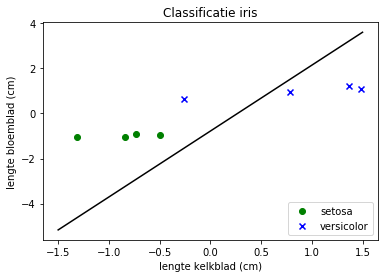

foutenlijst = [-0.001]
epoch = 1
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010978209736397106
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.019594026788085802
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.00689432618689319
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012134656054442895
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.013473657585250317
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.0029929978501509044
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.010900418536474672

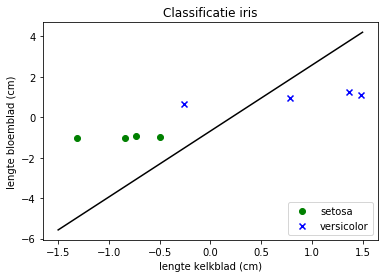

foutenlijst = [-0.001, -0.001]
epoch = 2
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.010373722471131035
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018920205475806036
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.006393044238545806
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011583387933652496
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.014795807547336049
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.004415120157122669
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.0123370642

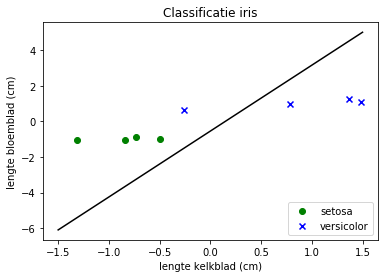

foutenlijst = [-0.001, -0.001, -0.001]
epoch = 3
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009769235205864967
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.018246384163526273
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005891762290198422
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.011032119812862094
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.016117957509421778
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.005837242464094433
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.01

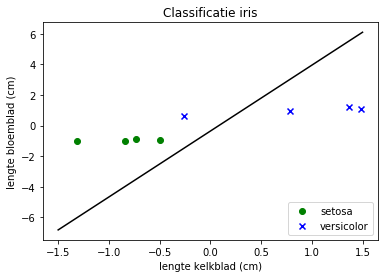

foutenlijst = [-0.001, -0.001, -0.001, -0.001]
epoch = 4
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.009164747940598897
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01757256285124651
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.005390480341851038
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.010480851692071693
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01744010747150751
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.007259364771066198
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte

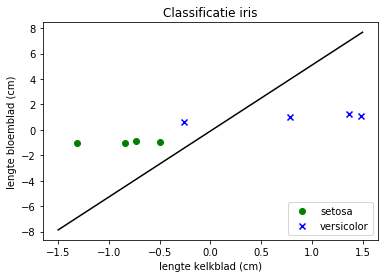

foutenlijst = [-0.001, -0.001, -0.001, -0.001, -0.001]
epoch = 5
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.008560260675332828
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.016898741538966748
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.004889198393503653
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.009929583571281292
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.01876225743359324
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.008681487078037963
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijki

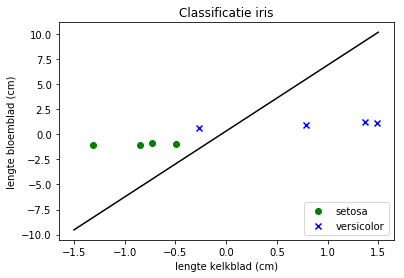

foutenlijst = [-0.001, -0.001, -0.001, -0.001, -0.001, -0.001]
epoch = 6
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.00795577341006676
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.016224920226686985
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.00438791644515627
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.009378315450490891
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.02008440739567897
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.010103609385009728
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in verg

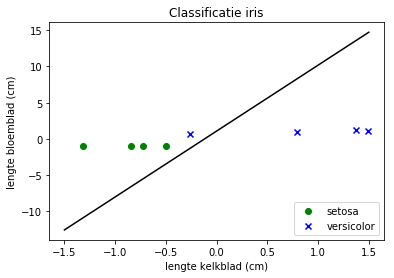

foutenlijst = [-0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001]
epoch = 7
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.00735128614480069
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.01555109891440722
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0038866344968088856
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.00882704732970049
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.0214065573577647
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.011525731691981494
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld 

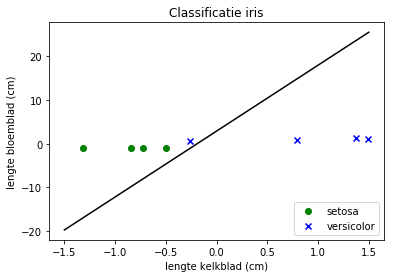

foutenlijst = [-0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001]
epoch = 8
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.0067467988795346205
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.014877277602127462
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.0033853525484615014
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.008275779208910088
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.02272870731985043
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.012947853998953257
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
p

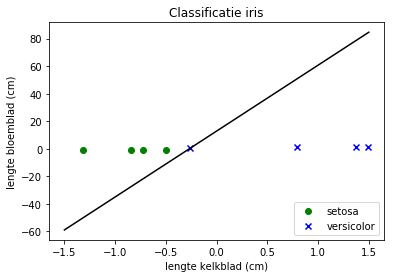

foutenlijst = [-0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001]
epoch = 9
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.006142311614268551
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.014203456289847698
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.002884070600114117
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.007724511088119688
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.02405085728193616
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.014369976305925021
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	labe

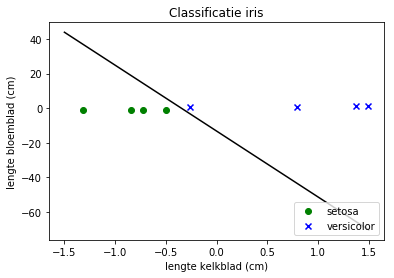

foutenlijst = [-0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001]
epoch = 10
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.005537824349002482
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.013529634977567935
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.002382788651766733
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.007173242967329286
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.025373007244021892
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.015792098612896786
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029

punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.025373007244021892
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.015792098612896786
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.023830229857229383
gegiste klasse = 1
update= 0.0
teller = 7
punt: [-0.26255698  0.64752391] 	label: 1
punt ingevuld in vergelijking rechte: 0.0013744150504419609
gegiste klasse = 1
update= 0.0
foutenlijst = [-0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, 0, 0, 0, 0, 0, 0, 0, 0]
epoch = 18
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.005537824349002482
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.013529634977567935
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594

In [73]:
# perceptron, leersnelheid 0.001 en 20 pogingen
ppn = Perceptron(eta=.001, n_iter=20)
ppn.fit(X,y)

Gelukt na 10 epochs!<br>
Misschien kan het sneller met een nog grotere leersnelheid.

Initiële willekeurige gewichten: [ 0.01624345 -0.00611756 -0.00528172]
De grens is een rechte met vgl. 0.01624345363663242 * x1 + -0.006117564136500754 * x2 + -0.005281717522634557 = 0


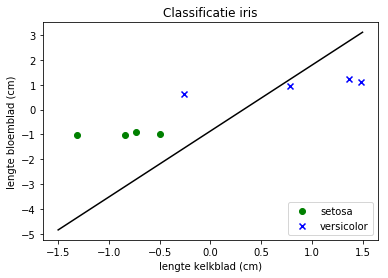

epoch = 0
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.011582697001663174
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.020267848100365565
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.007395608135240574
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.012685924175233298
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.012151507623164587
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.00157087554317914
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.009463772834168592
gegiste klasse = 1
upda

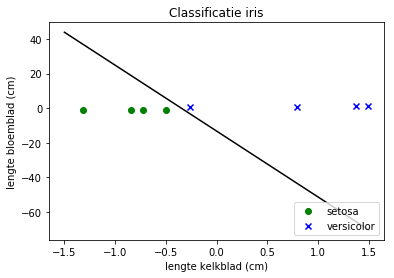

foutenlijst = [-0.01]
epoch = 1
teller = 0
punt: [-0.72932496 -0.90653347] 	label: 0
punt ingevuld in vergelijking rechte: -0.005537824349002489
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-1.31278492 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.013529634977567942
gegiste klasse = 0
update= 0.0
teller = 2
punt: [-0.49594097 -0.97128586] 	label: 0
punt ingevuld in vergelijking rechte: -0.002382788651766737
gegiste klasse = 0
update= 0.0
teller = 3
punt: [-0.84601695 -1.03603825] 	label: 0
punt ingevuld in vergelijking rechte: -0.007173242967329293
gegiste klasse = 0
update= 0.0
teller = 4
punt: [1.48782291 1.10079064] 	label: 1
punt ingevuld in vergelijking rechte: 0.025373007244021903
gegiste klasse = 1
update= 0.0
teller = 5
punt: [0.78767095 0.97128586] 	label: 1
punt ingevuld in vergelijking rechte: 0.01579209861289679
gegiste klasse = 1
update= 0.0
teller = 6
punt: [1.37113092 1.23029543] 	label: 1
punt ingevuld in vergelijking rechte: 0.023830229857229396
g

In [68]:
# perceptron, leersnelheid 0.01 en 10 pogingen
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X,y)

Gelukt! En blijkbaar al heel snel, na één epoch.

<div style='color: #690027;' markdown="1">
    <h3>4.3 Probeer eens hetzelfde met twee andere kenmerken, bv.  lengte kelkblad t.o.v. breedte kelkblad</h3> 
</div>

In [75]:
# setosa en versicolor selecteren
# breedte kelkblad en lengte kelkblad selecteren
K2 = iris.iloc[46:54, [0, 1]].values  # gekozen kenmerken in eerste en tweede kolom 
# K2[:]
# print(K2)
K2.shape       

(8, 2)

In [76]:
print(K2[:, 0])    # eerste kolom: lengte kelkblad
print(K2[:, 1])    # tweede kolom: breedte kelkblad

[5.1 4.6 5.3 5.  7.  6.4 6.9 5.5]
[3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3]


In [84]:
x22 = K2[:, 0]      # breedte kelkblad speelt rol van x2 en komt terecht op de y-as
x22 = (x22-np.mean(x22))/np.std(x22)
x21 = K2[:, 1]     # breedte kelkblad speelt rol van x1 en komt terecht op de x-as
x21 = (x21-np.mean(x21))/np.std(x21)
# gestandaardiseerde kenmerken opnieuw in matrix steken
X2 = np.stack((x21, x22), axis = 1) # axis 1 betekent dat x1 en x2 worden beschouwd als kolommen (bij axis 0 rijen)
print(X2)

[[ 1.35764707 -0.72932496]
 [-0.05902813 -1.31278492]
 [ 1.12153454 -0.49594097]
 [ 0.1770844  -0.84601695]
 [-0.05902813  1.48782291]
 [-0.05902813  0.78767095]
 [-0.29514067  1.37113092]
 [-2.18404094 -0.26255698]]


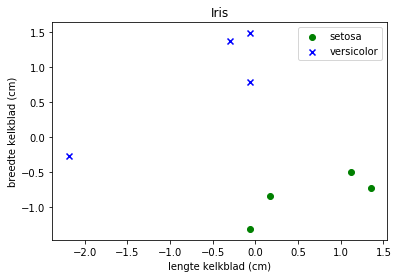

In [85]:
# lengte bloemblad t.o.v. breedte kelkblad
plt.scatter(x21[:4], x22[:4], color="green", marker="o", label="setosa")      
plt.scatter(x21[4:], x22[4:], color="blue", marker="x", label="versicolor")   
           
plt.title("Iris")
plt.xlabel("lengte kelkblad (cm)")
plt.ylabel("breedte kelkblad (cm)")
plt.legend(loc="upper right")
plt.show()

De punten zijn lineair scheidbaar.

In [79]:
y2 = iris.iloc[46:54, 4].values             # labels, laatste kolom van de oorspronkelijke tabel
y2 = np.where(y2 == "Iris-setosa", 0, 1)     # labels numeriek maken, setosa:1, versicolor:0

In [80]:
def grafiek2(coeff_x1, coeff_x2, cte):
        """Plot scheidingsrechte ('decision boundary') en geeft vergelijking ervan."""
        # breedte kelkblad t.o.v. lengte kelkblad
        plt.scatter(x21[:4], x22[:4], color="green", marker="o", label="setosa")      # setosa zijn eerste 4 (label 0)
        plt.scatter(x21[4:], x22[4:], color="blue", marker="x", label="versicolor")   # versicolor zijn de volgende 4 (label 1)
        x = np.linspace(-1.5, 1.5, 10)
        y_r = -coeff_x1/coeff_x2 * x - cte/coeff_x2
        print("De grens is een rechte met vgl.", coeff_x1, "* x1 +", coeff_x2, "* x2 +", cte, "= 0")
        plt.plot(x, y_r, color="black")
        
        plt.title("Classificatie iris")
        plt.xlabel("lengte kelkblad (cm)")
        plt.ylabel("breedte kelkblad (cm)")
        plt.legend(loc="lower right")
        plt.show()


class Perceptron2(object):
    """Perceptron classifier.""" 
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """self heeft drie parameters: leersnelheid, aantal pogingen, willekeurigheid."""
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        # kolommatrix van de gewichten ('weights')
        # willekeurig gegenereerd uit normale verdeling met gemiddelde 0 en standaardafwijking 0.01
        # aantal gewichten is aantal kenmerken in X plus 1 (+1 voor de bias)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)     # gewichtenmatrix die 3 gewichten bevat 
        print("Initiële willekeurige gewichten:", self.w_)
        self.errors_ = []    # foutenlijst
       
        # plot grafiek met scheidingsrechte
        grafiek2(self.w_[0], self.w_[1], self.w_[2])
        
        # gewichten punt per punt aanpassen, gebaseerd op feedback van de verschillende pogingen        
        for _ in range(self.n_iter):
            print("epoch =", _)
            errors = 0
            teller = 0
            for x, label in zip(X, y):            # x is datapunt, y overeenkomstig label
                print("teller =", teller)         # tel punten, het zijn er acht
                print("punt:", x, "\tlabel:", label)
                gegiste_klasse = self.predict(x)
                print("gegiste klasse =", gegiste_klasse)
                # aanpassing nagaan voor dit punt
                update = self.eta * (gegiste_klasse - label)     # als update = 0, juiste klasse, geen aanpassing nodig
                print("update=", update)
                # grafiek en gewichten eventueel aanpassen na dit punt
                if update !=0:
                    self.w_[0:2] -= update *x
                    self.w_[2] -= update
                    errors += update
                    print("gewichten =", self.w_)
                    grafiek2(self.w_[0], self.w_[1], self.w_[2])     # voorlopige 'decision boundary'
                teller += 1
            self.errors_.append(errors)           # na alle punten, totale fout toevoegen aan foutenlijst
            print("foutenlijst =", self.errors_)          
        return self        # geeft gewichtenmatrix en errorlijst terug
    
    def net_input(self, x):      # punt invullen in de voorlopige scheidingsrechte
        """Berekenen van z = lineaire combinatie van de  inputs inclusief bias en de weights voor elke gegeven punt."""
        return np.dot(x, self.w_[0:2]) + self.w_[2]
    
    def predict(self, x):
        """Gist klasse."""
        print("punt ingevuld in vergelijking rechte:", self.net_input(x))
        klasse = np.where(self.net_input(x) >=0, 1, 0)
        return klasse
    

Initiële willekeurige gewichten: [ 0.01624345 -0.00611756 -0.00528172]
De grens is een rechte met vgl. 0.01624345363663242 * x1 + -0.006117564136500754 * x2 + -0.005281717522634557 = 0


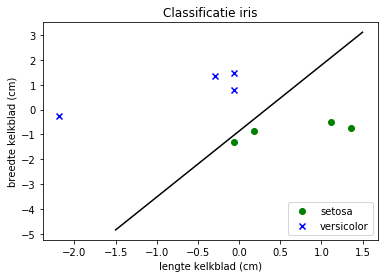

epoch = 0
teller = 0
punt: [ 1.35764707 -0.72932496] 	label: 0
punt ingevuld in vergelijking rechte: 0.021232851966866167
gegiste klasse = 1
update= 0.1
gewichten = [-0.11952125  0.06681493 -0.10528172]
De grens is een rechte met vgl. -0.11952125366658724 * x1 + 0.0668149316124465 * x2 + -0.10528171752263456 = 0


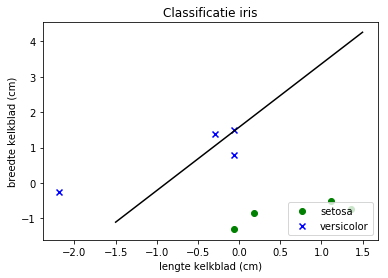

teller = 1
punt: [-0.05902813 -1.31278492] 	label: 0
punt ingevuld in vergelijking rechte: -0.18594023587619435
gegiste klasse = 0
update= 0.0
teller = 2
punt: [ 1.12153454 -0.49594097] 	label: 0
punt ingevuld in vergelijking rechte: -0.27246519367288424
gegiste klasse = 0
update= 0.0
teller = 3
punt: [ 0.1770844  -0.84601695] 	label: 0
punt ingevuld in vergelijking rechte: -0.18297363181784182
gegiste klasse = 0
update= 0.0
teller = 4
punt: [-0.05902813  1.48782291] 	label: 1
punt ingevuld in vergelijking rechte: 0.001182185210178377
gegiste klasse = 1
update= 0.0
teller = 5
punt: [-0.05902813  0.78767095] 	label: 1
punt ingevuld in vergelijking rechte: -0.04559842006141477
gegiste klasse = 0
update= -0.1
gewichten = [-0.12542407  0.14558203 -0.00528172]
De grens is een rechte met vgl. -0.12542406702759676 * x1 + 0.14558202702130962 * x2 + -0.005281717522634552 = 0


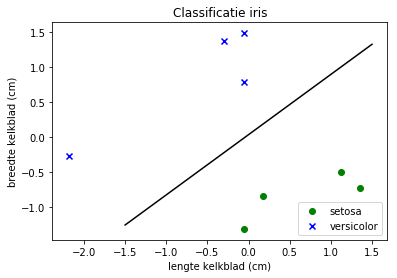

teller = 6
punt: [-0.29514067  1.37113092] 	label: 1
punt ingevuld in vergelijking rechte: 0.23134804406636833
gegiste klasse = 1
update= 0.0
teller = 7
punt: [-2.18404094 -0.26255698] 	label: 1
punt ingevuld in vergelijking rechte: 0.230426002134471
gegiste klasse = 1
update= 0.0
foutenlijst = [0.0]
epoch = 1
teller = 0
punt: [ 1.35764707 -0.72932496] 	label: 0
punt ingevuld in vergelijking rechte: -0.2817399406789932
gegiste klasse = 0
update= 0.0
teller = 1
punt: [-0.05902813 -1.31278492] 	label: 0
punt ingevuld in vergelijking rechte: -0.18899605913959422
gegiste klasse = 0
update= 0.0
teller = 2
punt: [ 1.12153454 -0.49594097] 	label: 0
punt ingevuld in vergelijking rechte: -0.2181492325193517
gegiste klasse = 0
update= 0.0
teller = 3
punt: [ 0.1770844  -0.84601695] 	label: 0
punt ingevuld in vergelijking rechte: -0.15065722585742963
gegiste klasse = 0
update= 0.0
teller = 4
punt: [-0.05902813  1.48782291] 	label: 1
punt ingevuld in vergelijking rechte: 0.2187221066276297
gegiste 

In [86]:
ppn = Perceptron2(eta=0.1, n_iter=8)
ppn.fit(X2,y2)

Gelukt na 1 epoch!

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Dua, D., & Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. <br> &nbsp; &nbsp; &nbsp; &nbsp; Irvine, CA: University of California, School of Information and Computer Science.<br>
[2] Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. *Annals of Eugenics*. 7(2), 179–188. <br> &nbsp; &nbsp; &nbsp; &nbsp; https://doi.org/10.1111/j.1469-1809.1936.tb02137.x.<br>
[3] Kosaciec Szczecinkowaty [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons;<br>
[4] Frank Mayfield [CC BY-SA 2.0 (https://creativecommons.org/licenses/by-sa/2.0)], via Wikimedia Commons;<br>
[5] No machine-readable author provided. Dlanglois assumed (based on copyright claims). <br> &nbsp; &nbsp; &nbsp; &nbsp;
[CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0/)], via Wikimedia Commons

<img src="../.images/cclic.png" alt="Banner" align="left" style="width:80px;"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">ai op school</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.